In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# 1. Business Understanding

 I am a football fan and also love Soccer Video Game. Harder to play, but that makes for a better 
 gaming experience.I am interested in exploring the latest FIFA 19 dataset. The task or questions I will
 target for as below:
        
     1 : Who are the Top 5 Highly Paid Players?
     2 : Find top 5 clubs with highest total player market value, and the highest average player wage.
     3 : Which top 5 Nations have the greatest number of Players in the FIFA 19 dataset?

# 2.Data Understanding

I am using FIFA 19 Dataset from Kaggle.The Dataset from kaggle - 'data.csv'  which contains all the information of the Players.

In [34]:
# Read in the Dataset
fifa19_data = pd.read_csv('./data.csv')
fifa19_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [35]:
num_rows = fifa19_data.shape[0] #Provide the number of rows in the dataset
num_cols = fifa19_data.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 18207
Column number: 89


In [36]:
# To check the column names
fifa19_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [37]:
fifa19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [38]:
# Get the info from the dataset
fifa19_data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# 3. Data Preparation

 Some data preparation step : 
        - Drop unused columns
        - Check columns for missing values
        - One-Hot Encoding for Categorical variables

In [39]:
# Dropping unused columns
fifa19_data.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace = True)
fifa19_data.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [40]:
# missing values
columns_with_missing_values = set(fifa19_data.columns[fifa19_data.isnull().mean()!=0])
print(columns_with_missing_values)

{'RS', 'Weak Foot', 'LCM', 'LCB', 'Skill Moves', 'Club', 'CAM', 'Composure', 'International Reputation', 'CDM', 'LB', 'LWB', 'SprintSpeed', 'ShotPower', 'RW', 'Finishing', 'HeadingAccuracy', 'Positioning', 'Vision', 'CM', 'CB', 'Marking', 'SlidingTackle', 'Agility', 'Height', 'RB', 'Stamina', 'RAM', 'LongPassing', 'RWB', 'Curve', 'Acceleration', 'StandingTackle', 'LS', 'RCM', 'RF', 'RDM', 'Position', 'Body Type', 'Dribbling', 'Preferred Foot', 'GKKicking', 'Real Face', 'LM', 'ShortPassing', 'LW', 'LongShots', 'LF', 'GKDiving', 'LAM', 'Interceptions', 'FKAccuracy', 'Strength', 'ST', 'Balance', 'Aggression', 'RM', 'Penalties', 'RCB', 'Weight', 'Crossing', 'GKPositioning', 'Loaned From', 'Volleys', 'GKReflexes', 'BallControl', 'Joined', 'GKHandling', 'LDM', 'Release Clause', 'Jersey Number', 'CF', 'Work Rate', 'Jumping', 'Contract Valid Until', 'Reactions'}


In [41]:
# Here we define a function which conver string values into numbers
def str_to_number_convertion(amount):
    """
    This function will convert string to float
    
    Parameter:
    price(str): Price values in string type with M & K as abbreviation for Million and Thousands respectively
    
    Returns:
    float: A float number represents the Amount in millions
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [42]:
# calling a function to convert string to number

fifa19_data['Wage_value']  = fifa19_data['Wage'].map(lambda x: str_to_number_convertion(x))

fifa19_data['Value_value'] = fifa19_data['Value'].map(lambda x: str_to_number_convertion(x))

In [43]:
# One-Hot Encoding Categorical variables - Club, Nationality, Position
lben = LabelEncoder()

fifa19_data['Club_encoder']               = lben.fit_transform(fifa19_data['Club'].astype(str))
fifa19_data['Nationality_encoder']        = lben.fit_transform(fifa19_data['Nationality'].astype(str))
fifa19_data['Position_encoder'] = lben.fit_transform(fifa19_data['Position'].astype(str))

fifa19_data.describe()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Wage_value,Value_value,Club_encoder,Nationality_encoder,Position_encoder
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000
mean,9103.000000,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,16.616223,16.391596,16.232061,16.388898,16.710887,9731.312133,2.410696e+06,328.786785,76.136156,11.401878
std,5256.052511,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,17.695349,16.906900,16.502864,17.034669,17.955119,21999.290406,5.594933e+06,190.473968,47.834069,8.831451
min,0.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4551.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1000.000000,3.000000e+05,164.000000,35.000000,4.000000
50%,9103.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,3000.000000,6.750000e+05,329.000000,59.000000,8.000000
75%,13654.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,9000.000000,2.000000e+06,493.000000,123.000000,19.000000
max,18206.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,90.000000,92.000000,91.000000,90.000000,94.000000,565000.000000,1.185000e+08,651.000000,163.000000,27.000000


# 4.Questions : Answer 

   Question 1. Who are the Top 5 Highly Paid Players?

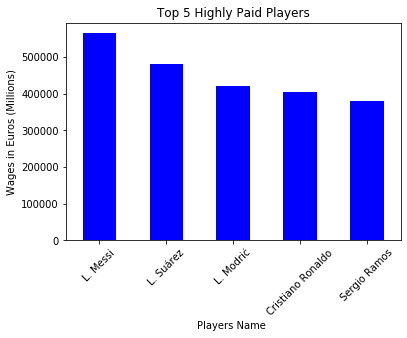

In [44]:
fifa19_data.groupby('Name')['Wage_value'].sum().sort_values(ascending = False).head().plot(kind = 'bar', color = 'blue')
plt.title('Top 5 Highly Paid Players')
plt.xlabel('Players Name ')
plt.ylabel('Wages in Euros (Millions)')
plt.xticks(rotation = 45);
plt.show()

 Question 2: Find top 5 clubs with highest total player market value, and the highest average player wage

In [46]:
Value_Wage_DF = fifa19_data[["Name", "Club", "Value_value", "Wage_value"]]
Value_Wage_DF.head()

,Name,Club,Value_value,Wage_value
0,L. Messi,FC Barcelona,110500000.0,565000.0
1,Cristiano Ronaldo,Juventus,77000000.0,405000.0
2,Neymar Jr,Paris Saint-Germain,118500000.0,290000.0
3,De Gea,Manchester United,72000000.0,260000.0
4,K. De Bruyne,Manchester City,102000000.0,355000.0


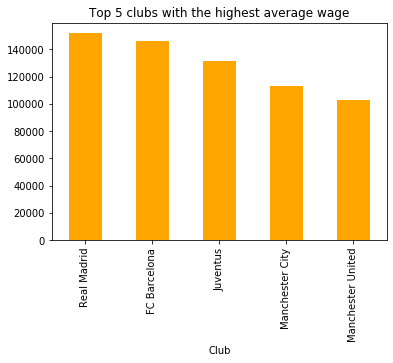

In [47]:
# Find top 5 clubs with the highest average wage
Value_Wage_DF.groupby("Club")["Wage_value"].mean().sort_values(ascending=False).head().plot(kind="bar",color='orange');
plt.title("Top 5 clubs with the highest average wage");

Que 3 : Which top 5 Nations have the greatest number of Players in the FIFA 19 dataset?

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


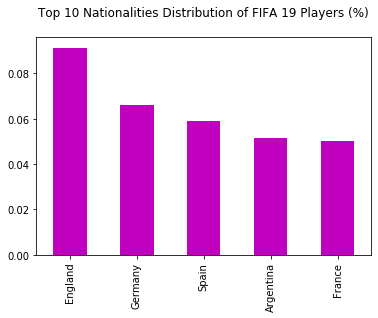

In [48]:
nationality_names = fifa19_data.Nationality.value_counts()
print(nationality_names.head(10))

# visualising 
(nationality_names[:5]/len(fifa19_data)).plot.bar(color='m');
plt.title("Top 10 Nationalities Distribution of FIFA 19 Players (%)\n");